In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.datasets import cifar100 
from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam, Adadelta 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
from google.colab import files 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image 
import random 
import math 
import os  

%matplotlib inline

In [ ]:
(xtrainOrg, ytrainOrg), (xtestOrg, ytestOrg) = mnist.load_data()# оригинальные переменные для тренировочных и тестовых данных

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrainOrg.shape

(60000, 28, 28)

In [ ]:
ytrainOrg = utils.to_categorical(ytrainOrg, 10)
ytestOrg = utils.to_categorical(ytestOrg, 10)

xtrainOrg = xtrainOrg.reshape(xtrainOrg.shape[0], 28, 28, 1)
xtestOrg = xtestOrg.reshape(xtestOrg.shape[0], 28, 28, 1)

In [ ]:
# смотрим форматы выборок перед обучением
print(xtrainOrg.shape)
print(xtestOrg.shape)
print(ytrainOrg.shape)
print(ytestOrg.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**стандартные настройки**

In [ ]:
batchSize = 128 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3467 - accuracy: 0.8927 - val_loss: 0.0477 - val_accuracy: 0.9843
Epoch 2/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 3/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0384 - val_accuracy: 0.9890
Epoch 4/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0272 - val_accuracy: 0.9912
Epoch 5/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0273 - val_accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0303 - val_accuracy: 0.9905
Epoch 7/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0278 - val_accuracy: 0.9906

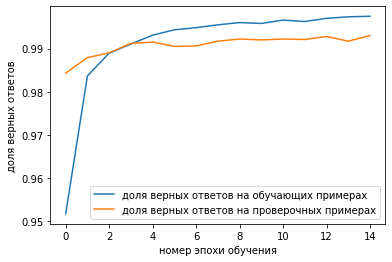

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**скрытый слой 2 нейрона**

In [ ]:
batchSize = 128 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(2, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(2, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 4s 7ms/step - loss: 0.9567 - accuracy: 0.7003 - val_loss: 0.1600 - val_accuracy: 0.9504
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.2434 - accuracy: 0.9224 - val_loss: 0.1119 - val_accuracy: 0.9647
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1778 - accuracy: 0.9426 - val_loss: 0.0938 - val_accuracy: 0.9690
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1488 - accuracy: 0.9511 - val_loss: 0.0795 - val_accuracy: 0.9733
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1273 - accuracy: 0.9587 - val_loss: 0.0752 - val_accuracy: 0.9750
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1160 - accuracy: 0.9609 - val_loss: 0.0697 - val_accuracy: 0.9787
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1078 - accuracy: 0.9651 - val_loss: 0.0653 - val_accuracy: 0.9788
Epoch 

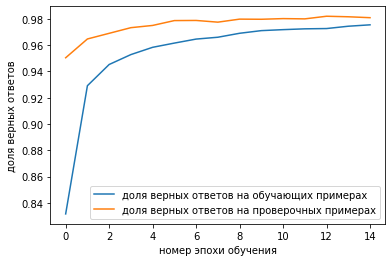

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**скрытый слой 4 нейрона**

In [ ]:
batchSize = 128 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(4, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.5751 - accuracy: 0.8216 - val_loss: 0.0863 - val_accuracy: 0.9736
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1297 - accuracy: 0.9596 - val_loss: 0.0589 - val_accuracy: 0.9810
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.0489 - val_accuracy: 0.9838
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0770 - accuracy: 0.9759 - val_loss: 0.0447 - val_accuracy: 0.9843
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0682 - accuracy: 0.9783 - val_loss: 0.0463 - val_accuracy: 0.9837
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0615 - accuracy: 0.9802 - val_loss: 0.0391 - val_accuracy: 0.9858
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 0.0400 - val_accuracy: 0.9853
Epoch 

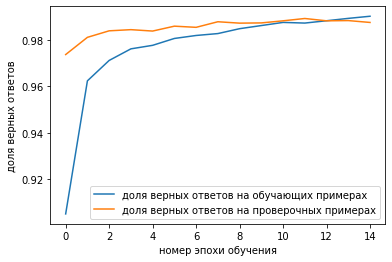

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**скрытый слой 16 нейрона**

In [ ]:
batchSize = 128 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.4538 - accuracy: 0.8574 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0296 - val_accuracy: 0.9896
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.0267 - val_accuracy: 0.9915
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0331 - val_accuracy: 0.9893

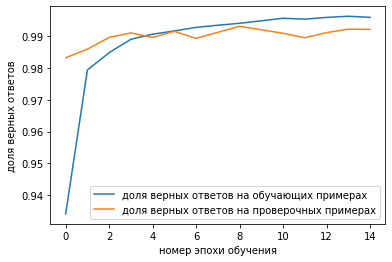

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**Поменял активационную функцию в скрытых слоях с relu на linear**

In [ ]:
batchSize = 128 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='linear'))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='linear'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='linear'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
469/469 [==============================] - 95s 202ms/step - loss: 0.4050 - accuracy: 0.8823 - val_loss: 0.0871 - val_accuracy: 0.9717
Epoch 2/15
469/469 [==============================] - 94s 201ms/step - loss: 0.0990 - accuracy: 0.9701 - val_loss: 0.0771 - val_accuracy: 0.9756
Epoch 3/15
469/469 [==============================] - 95s 202ms/step - loss: 0.0839 - accuracy: 0.9741 - val_loss: 0.0765 - val_accuracy: 0.9763
Epoch 4/15
469/469 [==============================] - 95s 202ms/step - loss: 0.0708 - accuracy: 0.9778 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 5/15
469/469 [==============================] - 94s 201ms/step - loss: 0.0662 - accuracy: 0.9789 - val_loss: 0.0709 - val_accuracy: 0.9768
Epoch 6/15
469/469 [==============================] - 93s 199ms/step - loss: 0.0623 - accuracy: 0.9802 - val_loss: 0.0693 - val_accuracy: 0.9779
Epoch 7/15
469/469 [==============================] - 93s 199ms/step - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.0771 - val_ac

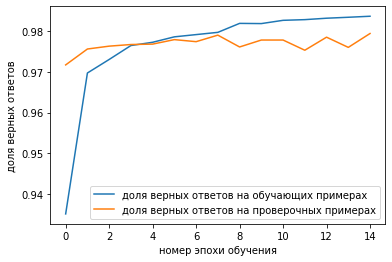

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**batch_size: 10**

In [ ]:
batchSize = 10 

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
6000/6000 [==============================] - 228s 38ms/step - loss: 0.2172 - accuracy: 0.9318 - val_loss: 0.0462 - val_accuracy: 0.9859
Epoch 2/15
6000/6000 [==============================] - 229s 38ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0348 - val_accuracy: 0.9892
Epoch 3/15
6000/6000 [==============================] - 232s 39ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0312 - val_accuracy: 0.9902
Epoch 4/15
6000/6000 [==============================] - 226s 38ms/step - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 5/15
6000/6000 [==============================] - 227s 38ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 6/15
6000/6000 [==============================] - 224s 37ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0319 - val_accuracy: 0.9909
Epoch 7/15
6000/6000 [==============================] - 224s 37ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0

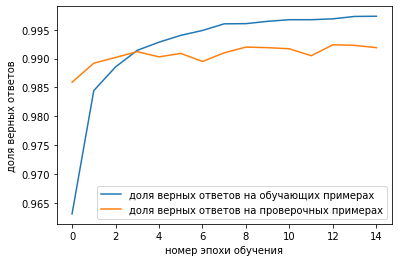

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**batch_size: 100**

In [ ]:
batchSize = 100

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
600/600 [==============================] - 132s 219ms/step - loss: 0.3427 - accuracy: 0.8907 - val_loss: 0.0495 - val_accuracy: 0.9825
Epoch 2/15
600/600 [==============================] - 131s 218ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0372 - val_accuracy: 0.9881
Epoch 3/15
600/600 [==============================] - 131s 218ms/step - loss: 0.0379 - accuracy: 0.9872 - val_loss: 0.0306 - val_accuracy: 0.9908
Epoch 4/15
600/600 [==============================] - 131s 219ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 5/15
600/600 [==============================] - 132s 220ms/step - loss: 0.0221 - accuracy: 0.9925 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 6/15
600/600 [==============================] - 133s 221ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0309 - val_accuracy: 0.9910
Epoch 7/15
600/600 [==============================] - 132s 220ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0298 -

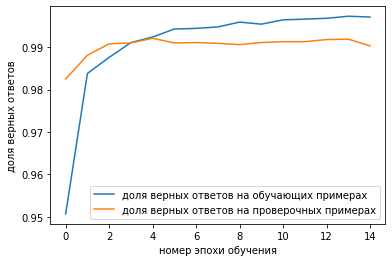

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

**batch_size: 50000**

In [ ]:
# Колаб позволяет даже в среде с ОЗУ обсчитывать размер пакета только около 20000,
#поэтому такой и поставил вместо 50000
batchSize = 20000

modelConv = Sequential()
modelConv.add(BatchNormalization(input_shape=(28, 28, 1)))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2, 2)))
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(256, activation='relu'))
modelConv.add(Dropout(0.25))
modelConv.add(Dense(10, activation='softmax'))

modelConv.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/15
3/3 [==============================] - 16s 3s/step - loss: 2.1146 - accuracy: 0.2657 - val_loss: 0.9523 - val_accuracy: 0.7680
Epoch 2/15
3/3 [==============================] - 5s 2s/step - loss: 1.0215 - accuracy: 0.7488 - val_loss: 0.9882 - val_accuracy: 0.8461
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 0.5624 - accuracy: 0.8196 - val_loss: 0.9659 - val_accuracy: 0.8825
Epoch 4/15
3/3 [==============================] - 5s 2s/step - loss: 0.4485 - accuracy: 0.8630 - val_loss: 0.8294 - val_accuracy: 0.9039
Epoch 5/15
3/3 [==============================] - 5s 2s/step - loss: 0.3845 - accuracy: 0.8882 - val_loss: 0.6576 - val_accuracy: 0.9136
Epoch 6/15
3/3 [==============================] - 5s 2s/step - loss: 0.3136 - accuracy: 0.9099 - val_loss: 0.4789 - val_accuracy: 0.9242
Epoch 7/15
3/3 [==============================] - 5s 2s/step - loss: 0.2624 - accuracy: 0.9222 - val_loss: 0.3516 - val_accuracy: 0.9334
Epoch 8/15
3/3 [========================

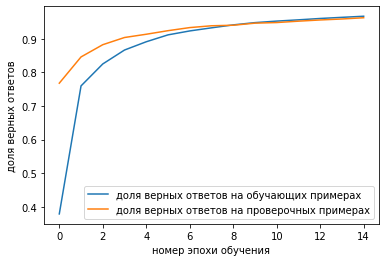

In [ ]:
historyConv = modelConv.fit(xtrainOrg, 
                    ytrainOrg, 
                    batch_size=batchSize, 
                    epochs=15,
                    validation_data=(xtestOrg, ytestOrg),
                    verbose=1)

plt.plot(historyConv.history['accuracy'], 
         label='доля верных ответов на обучающих примерах')
plt.plot(historyConv.history['val_accuracy'], 
         label='доля верных ответов на проверочных примерах')
plt.xlabel('номер эпохи обучения')
plt.ylabel('доля верных ответов')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
table=pd.DataFrame({'accuracy': [0.9979,0.9768,0.9914,0.9958,0.9847,0.9977,0.9972, 0.9667],
                    'проверочная точность': [0.9930, 0.9809,0.9874,0.9921,0.9794,0.9977,0.9903,0.9627]},
                   index=['стандартные настройки','скрытый слой 2 нейрона','скрытый слой 4 нейрона',
                          'скрытый слой 16 нейрона','активация: linear','batch_size: 10',
                          'batch_size: 100','batch_size: 20000'])


table

,accuracy,проверочная точность
стандартные настройки,0.9979,0.9930
скрытый слой 2 нейрона,0.9768,0.9809
скрытый слой 4 нейрона,0.9914,0.9874
скрытый слой 16 нейрона,0.9958,0.9921
активация: linear,0.9847,0.9794
batch_size: 10,0.9977,0.9977
batch_size: 100,0.9972,0.9903
batch_size: 20000,0.9667,0.9627


Выводы.

При повышении числа нейронов с 2 до 16 на сверточном слое точность на проверочной выборке возрастает совсем немного, при этом время обучения также повышается, т.е. от 4х нейронов уже колеблется около 99%, 16 нейронов будет оптимальным вариантом по времени и точности.

При изменении функции активации с relu на linear результат на проверочной выборке стал 98%, значит это хоть и слабо, но ухудшает распознавание.

Изменение размера пакета данных с 10 до 20000 мало влият на точность: это лишь слегка уменьшило точность с 99% до 96%, значит размер 20000 - неподходящий по точности, а размер 10 - неподходящий по времени выполнения, из этих трех вариантов оптимальный размер 100.